In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_final.csv')

In [3]:
df.head(3)

,Unnamed: 0,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,useType,processType,processPattern,processLevel,sentenceCount,sentenceInfo
0,0,EC_M05_241847,경제,중기밴처,CCTV 영상으로 핫해진 에스원,"에스원 자체 제작 영상, 유튜브·틱톡 조회수 3500만회 돌파 유튜버들과 협업한 콘...","#. 서울의 한 카페, 아르바이트생이 마감 청소 중 춤을 추고 있다.\n춤 솜씨가 ...",P1,1,A,0,하,15,"[{'sentenceNo': 1, 'sentenceContent': '#. 서울의 ..."
1,1,EC_M05_241848,경제,유통,"홈플러스, 신년 '반값, 하나 더 데이' 행사…하루 빠른 31일 시작",NaN,"홈플러스는 새해 첫 쇼핑 축제 '반값, 하나 더 데이' 행사를 경쟁사 대비 하루 빠...",P1,1,A,0,하,8,"[{'sentenceNo': 1, 'sentenceContent': ""홈플러스는 새..."
2,2,EC_M05_241851,경제,유통,"제주삼다수, 글로벌 품질 인증 갱신",NaN,제주특별자치도개발공사는 제주삼다수의 품질경영표준 ISO9001을 갱신함과 동시에 미...,P1,1,A,0,하,6,"[{'sentenceNo': 1, 'sentenceContent': '제주특별자치도..."


In [4]:
df = df[['newsTitle','newsSubTitle','newsContent','useType','processPattern']]
# df.to_csv('new_df_final.csv')

In [5]:
df[df['newsSubTitle'].isnull()]['useType'].value_counts()

useType
0    223548
1    206502
Name: count, dtype: int64

In [18]:
df[~df['newsSubTitle'].isnull()]['useType'].value_counts()

useType
0    109478
1    107591
Name: count, dtype: int64

In [6]:
df.isnull().sum()

newsTitle              0
newsSubTitle      430050
newsContent            0
useType                0
processPattern         0
dtype: int64

In [7]:
df.dropna(subset=['newsSubTitle'], inplace=True)

In [12]:
df.reset_index(inplace=True)

In [17]:
df['processPattern']

processPattern
0     107591
99     78973
11      7695
12      4829
24      4704
23      2686
15      2098
14      2064
22      1917
13      1889
21      1490
16      1133
Name: count, dtype: int64

In [26]:
df.to_csv('df_final_new.csv')

In [5]:
df.isnull().sum() # newsSubTitle 결측치를 어떻게 할건지  ??

newsCategory           0
newsTitle              0
newsSubTitle      430050
newsContent            0
useType                0
partNum                0
processPattern         0
sentenceCount          0
dtype: int64

## 밑에부분은 데이터 확인 부분 !(정합성 검정)

<Axes: xlabel='partNum', ylabel='count'>

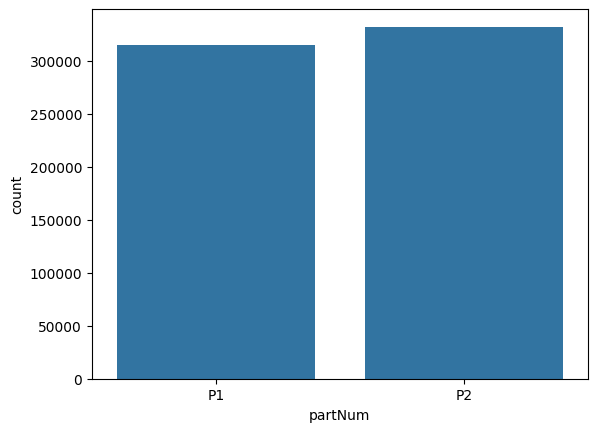

In [6]:
sns.countplot(x='partNum',data=df)

In [7]:
df['newsContent'].apply(lambda x : len(x)).sort_values(ascending=False) # 6000자 이상 되는것도 있음 

568709    6336
640279    6300
554902    5996
546289    5887
396949    5808
          ... 
465449     163
80978      163
376123     163
547621     141
205837     118
Name: newsContent, Length: 647119, dtype: int64

In [8]:
df['useType'].value_counts()

useType
0    333026
1    314093
Name: count, dtype: int64

In [9]:
df['processPattern'].value_counts()  # 유형 없는것들이 많은데 학습이 잘 될까 ?

processPattern
0     314093
99    242797
24     19821
11     18104
23     12233
12     10580
21      7333
22      5731
15      4968
14      4643
13      4290
16      2526
Name: count, dtype: int64

## 낚시 데이터 잘 생성 된건지 ?

### 1. 본문 , 제목 글자/단어 수 비교

In [10]:
df_o = df[df['useType']==0]    #낚시성기사
df_x = df[df['useType']==1]    #낚시성기사x

In [11]:
df_o.shape , df_x.shape

((333026, 8), (314093, 8))

In [12]:
df_o.head(3)

,newsCategory,newsTitle,newsSubTitle,newsContent,useType,partNum,processPattern,sentenceCount
133856,경제,[오늘의 이슈] 살충제 달걀 파동 속 bhc치킨 연간 6억규모 사회공헌기금 만들어,NaN,한국과 유럽에서 살충제 계란 문제가 불거져 치킨 업계가 어려움에 빠진 가운데 bhc...,0,P2,99,10
133857,경제,윤리 이슈로 곤욕 프랜차이즈업계 사회책임에 혼신,NaN,윤리 이슈로 곤욕을 치른 프랜차이즈 업계가 사회 책임 활동에 온 힘을 다하고 있다....,0,P2,99,18
133858,경제,'우린 가맹점에 대한 사회적 책임을 준수합니다',NaN,가맹점에 대한 사회적 책임을 활동을 펴는 가맹점 본부들이 늘어나고 있다.\n김상조 ...,0,P2,99,25


In [13]:
df_x.head(3)

,newsCategory,newsTitle,newsSubTitle,newsContent,useType,partNum,processPattern,sentenceCount
0,경제,CCTV 영상으로 핫해진 에스원,"에스원 자체 제작 영상, 유튜브·틱톡 조회수 3500만회 돌파 유튜버들과 협업한 콘...","#. 서울의 한 카페, 아르바이트생이 마감 청소 중 춤을 추고 있다.\n춤 솜씨가 ...",1,P1,0,15
1,경제,"홈플러스, 신년 '반값, 하나 더 데이' 행사…하루 빠른 31일 시작",NaN,"홈플러스는 새해 첫 쇼핑 축제 '반값, 하나 더 데이' 행사를 경쟁사 대비 하루 빠...",1,P1,0,8
2,경제,"제주삼다수, 글로벌 품질 인증 갱신",NaN,제주특별자치도개발공사는 제주삼다수의 품질경영표준 ISO9001을 갱신함과 동시에 미...,1,P1,0,6


In [14]:
df_o['본문글자수'] = df_o['newsContent'].map(lambda x : len(x))
df_x['본문글자수'] = df_x['newsContent'].map(lambda x : len(x))
df_o['제목글자수'] = df_o['newsTitle'].map(lambda x : len(x))
df_x['제목글자수'] = df_x['newsTitle'].map(lambda x : len(x))

C:\Users\User\AppData\Local\Temp\ipykernel_11372\1838152390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['본문글자수'] = df_o['newsContent'].map(lambda x : len(x))
C:\Users\User\AppData\Local\Temp\ipykernel_11372\1838152390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['본문글자수'] = df_x['newsContent'].map(lambda x : len(x))
C:\Users\User\AppData\Local\Temp\ipykernel_11372\1838152390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [23]:
print(f'낚시기사x 본문글자수 : {df_x["본문글자수"].mean()}')
# print(f'낚시기사 본문글자수 : {df_o['본문글자수'].mean()}')
# print(f'낚시기사x 제목글자수 : {df_x['제목글자수'].mean()}')
# print(f'낚시기사 제목글자수 : {df_o['제목글자수'].mean()}')

SyntaxError: f-string: unmatched '[' (1092658829.py, line 1)

-> 낚시기사가 본문 , 제목 글자수 미세하게 더 작다 

In [22]:
df_o['newsContent'] = df_o['newsContent'].str.replace('\n', ' ')
df_o['newsContent'] = df_o['newsContent'].str.replace('\\', ' ')
df_o['newsContent'] = df_o['newsContent'].str.replace('.', ' ')

df_x['newsContent'] = df_x['newsContent'].str.replace('\n', ' ')
df_x['newsContent'] = df_x['newsContent'].str.replace('\\', ' ')
df_x['newsContent'] = df_x['newsContent'].str.replace('.', ' ')                                                  

C:\Users\User\AppData\Local\Temp\ipykernel_11372\2096709625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['newsContent'] = df_o['newsContent'].str.replace('\n', ' ')
C:\Users\User\AppData\Local\Temp\ipykernel_11372\2096709625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['newsContent'] = df_o['newsContent'].str.replace('\\', ' ')
C:\Users\User\AppData\Local\Temp\ipykernel_11372\2096709625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [24]:
df_o['본문 단어'] = df_o['newsContent'].apply(lambda x: x.split())
df_x['본문 단어'] = df_x['newsContent'].apply(lambda x: x.split())
df_o['본문 단어 수'] = df_o['newsContent'].apply(lambda x: len(x.split()))
df_x['본문 단어 수'] = df_x['newsContent'].apply(lambda x: len(x.split()))

C:\Users\User\AppData\Local\Temp\ipykernel_11372\2900813070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['본문 단어'] = df_o['newsContent'].apply(lambda x: x.split())


In [24]:
print(f'낚시기사x 본문 단어수 : {df_x['본문 단어 수'].mean()}  ')
print(f'낚시기사 본문 단어수 : {df_o['본문 단어 수'].mean()}  ')

낚시기사x 본문 단어수 : 243.8746485913408  
낚시기사 본문 단어수 : 242.40310065880743  


In [25]:
print(f'낚시기사x 본문 문장수 : {df_x['sentenceCount'].mean()} ')
print(f'낚시기사 본문 문장수 : {df_o['sentenceCount'].mean()} ')

낚시기사x 본문 문장수 : 14.001120687185006 
낚시기사 본문 문장수 : 13.818776912313153 


#### 2. 제목과 본문 일치도

In [26]:
import Levenshtein # Levenshtein 사용 
def levenshtein_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

df_x['일치도'] = df_x.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)
df_o['일치도'] = df_o.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)

C:\Users\administ\ipykernel_20968\1939631648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['일치도'] = df_x.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)
C:\Users\administ\ipykernel_20968\1939631648.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['일치도'] = df_o.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)


In [27]:
print(f'낚시기사x 제목/본문 일치도 : {df_x['일치도'].mean()} ')
print(f'낚시기사 제목/본문 일치도 : {df_o['일치도'].mean()} ')
# 일치도는 낚시기사 아닌것이 높앗음 = good

낚시기사x 제목/본문 일치도 : 1043.0070870729369 
낚시기사 제목/본문 일치도 : 1041.6924624503793 


In [28]:
import difflib

def similarity_score(string1, string2):
    matcher = difflib.SequenceMatcher(None, string1, string2)
    return matcher.ratio()

# 데이터프레임의 각 행에 대해 유사성 계산
df_x['유사도'] = df_x.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)
df_o['유사도'] = df_o.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)

C:\Users\administ\ipykernel_20968\2262262308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['유사도'] = df_x.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)
C:\Users\administ\ipykernel_20968\2262262308.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['유사도'] = df_o.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)


In [31]:
print(f'낚시기사x 제목/본문 유사도 : {df_x['유사도'].mean()} ')
print(f'낚시기사 제목/본문 유사도 : {df_o['유사도'].mean()}')

낚시기사x 제목/본문 유사도 : 0.04480092962671489 
낚시기사 제목/본문 유사도 : 0.04336602156106317
